In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [48]:
org = ["aws","facebook","google","naver","kakao","apple","alibaba","tencent","baidu","microsoft","samsung","intel"]

In [52]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
for o in org:
    df = pd.read_excel("{}.xlsx".format(o))
    for idx,i in enumerate(df["Topics"]):
        if len(i)==2:
            df.drop(index=idx,inplace=True)
    df.reset_index()
    df.to_excel("{}.xlsx".format(o))
    result = []
    topic_dic = {}
    for idx,j in enumerate(df['Topics']):
        i_list = j.replace("[","").replace("]","").replace("'","").split(",")
        i_list = [i.strip() for i in i_list]
        df['Topics'][idx] = i_list
        for i in i_list:
            i = i.strip()
            i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
            if len(i)==0:
                continue
            if i not in topic_dic:
                topic_dic[i] = 1
            else:
                topic_dic[i] +=1

    topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
  
    # 218번 index 까지 5번 나오는 topic 임
    # 몇번까지 나오는것을 feature로 사용할 것인지?
#     num_of_word = 10
    
#     end_index = 0
#     for idx,item in enumerate(topic_dic):
#         if item[1] == num_of_word-1:
#             end_index = idx - 1
#             break
    topic_list = [i[0] for i in topic_dic]
    # 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
    df_vector = pd.DataFrame(topic_list).transpose()

    topic_dic_df = {}
    for i in topic_list:
        topic_dic_df[i]=0
    # 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
    df_vector = pd.DataFrame(result,index=df['ProjectName'],columns=topic_list).fillna(0)

    # 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
    for idx,topics in enumerate(df['Topics']):
        for topic in topics:
            if topic in topic_list:
                topic = same_things(topic)
                df_vector.loc[df['ProjectName'].iloc[idx],topic] += 1
    df_vector.to_excel("{}_vectors.xlsx".format(o),index=False)
    print("{}_vectors.xlsx".format(o),"저장완료.")


<ipython-input-52-480771cd4331>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Topics'][idx] = i_list


aws_vectors.xlsx 저장완료.
facebook_vectors.xlsx 저장완료.
google_vectors.xlsx 저장완료.
naver_vectors.xlsx 저장완료.
kakao_vectors.xlsx 저장완료.
apple_vectors.xlsx 저장완료.
alibaba_vectors.xlsx 저장완료.
tencent_vectors.xlsx 저장완료.
baidu_vectors.xlsx 저장완료.
microsoft_vectors.xlsx 저장완료.
samsung_vectors.xlsx 저장완료.
intel_vectors.xlsx 저장완료.


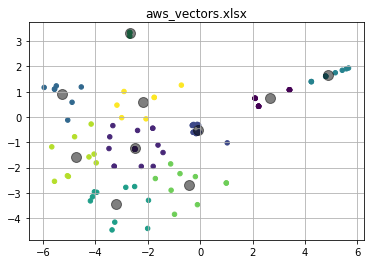

   num                                           clusters  cluster_num  \
0    0  [aws-nitro-enclaves-acm, aws-nitro-enclaves-sd...           18   
1    1  [aws-step-functions-data-science-sdk-python, a...           21   
2    2  [amazon-sagemaker-examples, aws-iot-device-sdk...           15   
3    3  [copilot-cli, deep-learning-containers, aws-la...            7   
4    4  [aws-cdk-rfcs, sagemaker-example-notebooks-tes...           11   
5    5  [aws-cdk, aws-sam-cli, eks-anywhere, sagemaker...           10   
6    6  [aws-iot-device-sdk-java-v2, aws-elastic-beans...            4   
7    7  [aws-sdk-java-v2, random-cut-forest-by-aws, aw...            9   
8    8  [s2n-tls, aws-rfdk, aws-sdk-go-v2, aws-cli, aw...            9   
9    9  [eks-distro, aws-toolkit-common, serverless-ap...            7   

                                       top_15_topics  
0  [(aws, 8), (nitro, 4), (sagemaker, 4), (nitro-...  
1  [(aws, 14), (hacktoberfest, 3), (amazon-neptun...  
2  [(aws, 7), (sagem

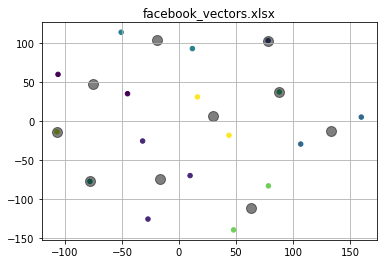

   num                                          clusters  cluster_num  \
0    0  [react-native-website, instant-articles-builder]            2   
1    1             [rocksdb, create-react-app, fbshipit]            3   
2    2                                      [pyre-check]            1   
3    3                                     [jest, metro]            2   
4    4                                [hhvm, docusaurus]            2   
5    5                                           [infer]            1   
6    6                                           [react]            1   
7    7                                   [buck, prophet]            2   
8    8                                        [CacheLib]            1   
9    9                                    [fbt, prepack]            2   

                                       top_15_topics  
0  [(react, 2), (docusaurus, 1), (editor, 1), (fa...  
1  [(data, 1), (storage-engine, 1), (react, 1), (...  
2  [(python, 1), (security, 1),

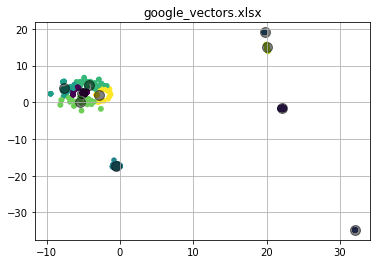

   num                                           clusters  cluster_num  \
0    0  [pytype, oss-fuzz, highway, go-containerregist...           83   
1    1  [cm360-audience-manager, dfdewey, schedviz, go...           52   
2    2  [tacotron, trimmed_match, nccl-fastsocket, cod...           42   
3    3  [percy-node, wikiloop-doublecheck, webauthndem...           34   
4    4  [j2cl, shopping-markup, argh, santa-tracker-we...           72   
5    5  [jax, filament, clusterfuzz, yapf, mlir-hs, Go...           28   
6    6  [tink, jax-cfd, XNNPACK, site-kit-wp, agi, fla...           38   
7    7  [pigweed, flatbuffers, syzkaller, closure-libr...           42   
8    8  [ldif, fully-homomorphic-encryption, iosched, ...           34   
9    9  [autocxx, iree, web-stories-wp, mediapipe, gvi...           41   

                                       top_15_topics  
0  [(android, 9), (golang, 7), (java, 5), (rust, ...  
1  [(crypto, 5), (go, 4), (golang, 3), (test, 3),...  
2  [(python, 9), (ma

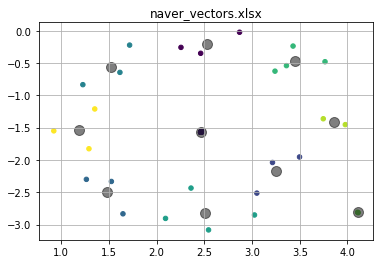

   num                                           clusters  cluster_num  \
0    0  [egjs-infinitegrid, spring-jdbc-plus, storyboo...            3   
1    1  [egjs-visible, prototype-minify, gdc, egjs-rot...           26   
2    2         [arcus-memcached, egjs-axes, arcus-spring]            3   
3    3      [fixture-monkey, egjs-list-differ, egjs-grid]            3   
4    4         [fe-news, egjs-persist, arcus-java-client]            3   
5    5  [billboard.js, egjs-view360, zeplin-flutter-ge...            4   
6    6  [egjs-flicking, egjs-view3d, cover-checker, eg...            4   
7    7                    [kapture-localization, kapture]            2   
8    8                           [arcus, auto-async-wrap]            2   
9    9               [egjs-imready, arcus-c-client, egjs]            3   

                                       top_15_topics  
0  [(egjs, 2), (react, 1), (javascript, 1), (grid...  
1  [(egjs, 7), (javascript, 6), (nlp, 4), (typesc...  
2  [(arcus, 2), (mem

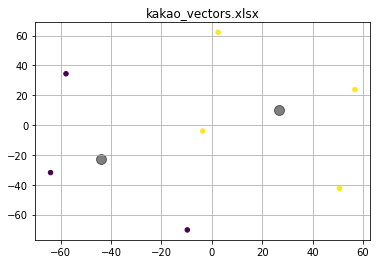

   num                                      clusters  cluster_num  \
0    0      [hbase-packet-inspector, cmux, cuesheet]            3   
1    1  [buffalo, n2, hbase-region-inspector, mango]            4   

                                       top_15_topics  
0  [(hbase, 2), (kafka, 1), (pcap, 1), (hadoop, 1...  
1  [(machinelearning, 3), (python, 2), (hbase, 2)...  
kakao_kmeans_10clusters.xlsx 저장완료
**************************************************


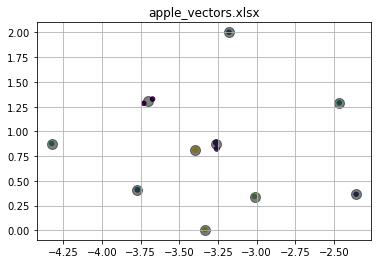

   num                                           clusters  cluster_num  \
0    0                        [swift-numerics, swift-nio]            2   
1    1  [swift-algorithms, swift-nio-http2, swift-argu...           15   
2    2                                      [servicetalk]            1   
3    3                                     [foundationdb]            1   
4    4                 [swift-collections, swift-atomics]            2   
5    5                                    [swift-nio-ssl]            1   
6    6                                      [coremltools]            1   
7    7                                             [cups]            1   
8    8                                    [swift-llbuild]            1   
9    9  [swift-system, swift-http-structured-headers, ...            9   

                                       top_15_topics  
0  [(math, 1), (mathematics, 1), (complex, 1), (m...  
1  [(swift, 4), (swiftnio, 3), (swift4, 2), (syst...  
2  [(http, 2), (reac

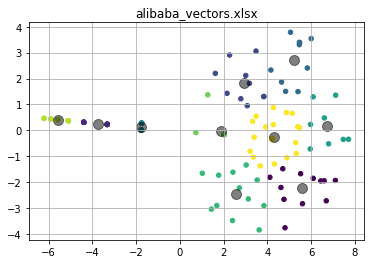

   num                                           clusters  cluster_num  \
0    0  [nacos, flutter_boost, BizCharts, rax, compile...           12   
1    1  [easydispatch, fish-redux, java-dns-cache-mani...           15   
2    2  [jetcache, funcraft, flink-ai-extended, taobao...           10   
3    3  [x-render, kt-connect, innodb-java-reader, MNN...           10   
4    4  [Tangram-Android, vlayout, Dynamic-popularity-...           13   
5    5  [sealer, arthas, hybridnet, clusterdata, web-e...            8   
6    6  [serverless-vscode, designable, formily, fastj...           12   
7    7  [dragonwell8, dawn, UltraViewPager, uirecorder...           14   
8    8  [youku-sdk-tool-woodpecker, Alink, pouch, sent...           10   
9    9  [hooks, pipcook, pont, alibaba-rsocket-broker,...           29   

                                       top_15_topics  
0  [(microservice, 2), (spring, 2), (alibaba, 2),...  
1  [(ios, 3), (react, 2), (aop, 2), (test, 2), (t...  
2  [(spring, 2), (ku

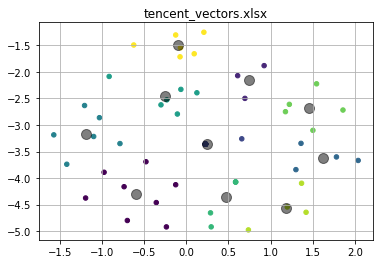

   num                                           clusters  cluster_num  \
0    0  [TNN, bk-sops, InjectFix, weui-wxss, weui, xLu...            8   
1    1                    [QMUI_Web, QMUI_iOS, Hardcoder]            3   
2    2  [bk-bcs, Biny, loli_profiler, WeComponents, Me...           24   
3    3     [Shadow, QMUI_Android, TSW, tencent-ml-images]            4   
4    4  [TurboTransformers, bk-cmdb, LuaPanda, weui.js...            6   
5    5    [QTAF, ncnn, matrix, Tendis, plato, sluaunreal]            6   
6    6  [secguide, puerts, omi, cloudbase-framework, s...            5   
7    7      [bk-PaaS, bk-bcs-saas, westore, MMKV, feflow]            5   
8    8                  [bk-ci, bk-job, APIJSON, Forward]            4   
9    9  [Hippy, mars, ScriptX, tinker, spring-cloud-te...            6   

                                       top_15_topics  
0  [(csharp, 2), (unity, 2), (weui, 2), (ocr, 1),...  
1  [(workflow, 1), (gulpfile, 1), (web-ui, 1), (s...  
2  [(test, 6), (andr

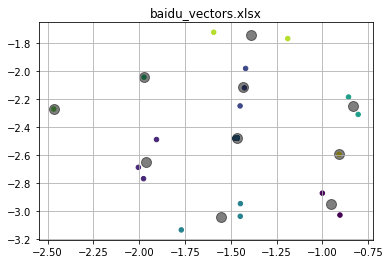

   num                                           clusters  cluster_num  \
0    0                                  [brpc-java, palo]            2   
1    1                    [openrasp, san-store, DDParser]            3   
2    2                            [amis, NoahV, BaikalDB]            3   
3    3  [unit-uskit, grafana-tsdb-datasource, Senta, l...           15   
4    4                   [san-ssr, san-router, iot-sdk-c]            3   
5    5                            [san-devtools, Familia]            2   
6    6                                              [san]            1   
7    7                                             [brcc]            1   
8    8                                [braft, san-update]            2   
9    9                                              [CUP]            1   

                                       top_15_topics  
0  [(spring, 2), (protobuf, 1), (microservice, 1)...  
1  [(security, 1), (waf, 1), (devsecops, 1), (ope...  
2  [(frontend, 2), (

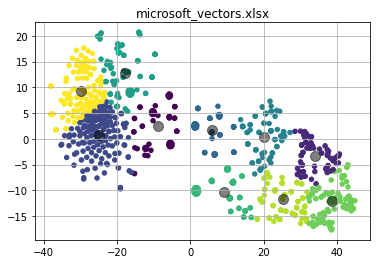

   num                                           clusters  cluster_num  \
0    0  [OpenEduAnalytics, coyote, DirectXTK, QuantumL...           78   
1    1  [coyote-scheduler, MixedReality-WebRTC, Direct...           70   
2    2  [onnxruntime, pxt, SdnDiagnostics, IoT-For-Beg...          157   
3    3  [DataMigrationTeam, globe, ml4f, csa-misc-util...           69   
4    4  [vscode-java-dependency, mu_silicon_arm_tiano,...           87   
5    5  [vscode, jacdac-ts, DirectXTex, qsharp-compile...           86   
6    6  [NubesGen, electionguard-api-python, weblogic-...           76   
7    7  [botframework-sdk, AutoBrewML, SQL-ProcBench, ...           93   
8    8  [azure-maven-archetypes, tslib, ShaderConducto...           88   
9    9  [winget-pkgs, FluidFramework, jacdac-docs, azu...           98   

                                       top_15_topics  
0  [(makecode, 9), (hol, 7), (ocp-isv, 7), (visio...  
1  [(microsoft, 11), (cpp, 10), (azure, 8), (pyth...  
2  [(machinelearning

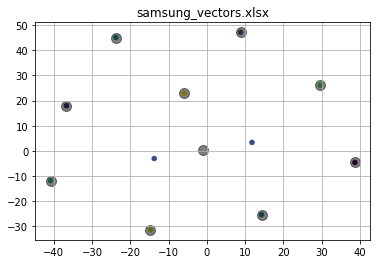

   num                  clusters  cluster_num  \
0    0                [escargot]            1   
1    1                  [gcutil]            1   
2    2  [thorvg.viewer, NLC2CMD]            2   
3    3                 [TizenFX]            1   
4    4              [ONE-vscode]            1   
5    5                  [thorvg]            1   
6    6               [Universum]            1   
7    7                 [qaboard]            1   
8    8                  [mTower]            1   
9    9                     [ONE]            1   

                                       top_15_topics  
0                                  [(javascript, 1)]  
1                  [(garbage-collector, 1), (gc, 1)]  
2  [(svg, 1), (svg-viewer, 1), (thorvg, 1), (thor...  
3  [(c-sharp, 1), (dotnet, 1), (tizen, 1), (devic...  
4                            [(vscode-extension, 1)]  
5  [(svg, 1), (image, 1), (png, 1), (shapes, 1), ...  
6  [(devops, 1), (continuous-delivery, 1), (ci, 1...  
7  [(performance-eng

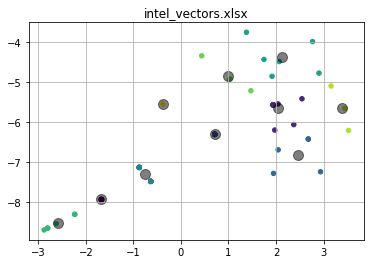

   num                                           clusters  cluster_num  \
0    0  [torch-ccl, webml-polyfill, inference-engine-n...            6   
1    1  [dffml, cve-bin-tool, he-toolkit, opencl-inter...           11   
2    2  [neural-compressor, compute-samples, vscode-sa...           10   
3    3  [llvm, PerfSpect, intel-device-plugins-for-kub...            5   
4    4  [systemc-compiler, rohd, wult, oneContainer-Cl...           14   
5    5  [iotg_tsn_ref_sw, GPGMM, tcf, openfl, kernel-f...            6   
6    6  [intel-cmt-cat, platform-aware-scheduling, obs...            6   
7    7  [scikit-learn-intelex, compute-runtime, vaapi-...            4   
8    8  [hexl, intel-extension-for-pytorch, cri-resour...            3   
9    9                                             [yask]            1   

                                       top_15_topics  
0  [(deep-learning, 3), (machinelearning, 2), (py...  
1  [(swrepo, 4), (data, 2), (security, 2), (pytho...  
2  [(vedio, 2), (vid

In [67]:
for o in org:
    excel_name = "{}_vectors.xlsx".format(o)
    df_org = pd.read_excel("{}.xlsx".format(o))
    df_vector = pd.read_excel(excel_name)
    m = TSNE(learning_rate = 50)
    tsne_features = m.fit_transform(pd.DataFrame(df_vector))
    df = pd.DataFrame()
    df['x'] = tsne_features[:,0]
    df['y'] = tsne_features[:,1]
    
    if len(df) <=10:
        n_clusters = len(df)//3
    else:
        # 10개의 Cluster 지정
        n_clusters = 10
    kmeans = KMeans(n_clusters=n_clusters)
    # kmeans = KMeans(n_clusters=4,verbose = 1)

    # 모델에 fitting 하기
    kmeans.fit(tsne_features)

    y_kmeans = kmeans.predict(tsne_features)
    y_kmeans[0:10] # 군집화 된 결과
    
    plt.scatter(np.array(tsne_features)[:,0], np.array(tsne_features)[:,1], c=y_kmeans, s=20, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
    plt.grid()
    plt.title(excel_name)
    plt.show()
    
    
    clustered_dic = {}
    clustered_list = []
    cluster_num = len(set(y_kmeans))
    for idx,i in enumerate(y_kmeans):
        if i not in clustered_dic:
            clustered_dic[i] = [df_org['ProjectName'][idx]]
        else:
            clustered_dic[i].append(df_org['ProjectName'][idx])
    clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
    df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
    cluster_num = [len(i) for i in df_cluster['clusters']]
    df_cluster['cluster_num'] = cluster_num
    
    # 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?
    topic_clustered_list = []
    for i in df_cluster['clusters']:
        temp_dic = {}
        for j in i:
            topics = list(df_org[df_org['ProjectName']==j]['Topics'].values[0].replace("[","").replace("]","").replace("'","").split(","))
            for i in topics:
                if len(i)==0:
                    continue
                i = same_things(i.strip())
                if i not in temp_dic:
                    temp_dic[i] = 1
                else:
                    temp_dic[i] += 1
        temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
        topic_clustered_list.append(temp_dic[:15])
    df_cluster['top_15_topics'] = topic_clustered_list
    df_cluster.to_excel("{}_kmeans_10clusters.xlsx".format(o),index=False)
    print(df_cluster)
    print("{}_kmeans_10clusters.xlsx".format(o),"저장완료")
    print("*"*50)
    


# DBSCAN

In [77]:
for o in org:
    excel_name = "{}_vectors.xlsx".format(o)
    df_org = pd.read_excel("{}.xlsx".format(o))
    df_vector = pd.read_excel(excel_name)
    # eps 값을 조정해나가면서 클러스터링을 해야 더 정확한 결과가 나온다
    dbscan = DBSCAN(eps = 0.3)
    dbscan_cluster = dbscan.fit_predict(df_vector)
    dbscan_cluster
    dbscan_clustered_dic = {}
    dbscan_clustered_list = []
    dbscan_cluster_num = len(set(dbscan_cluster))
    
    
    for idx,i in enumerate(dbscan_cluster):
        if i not in dbscan_clustered_dic:
            dbscan_clustered_dic[i] = [df_org['ProjectName'][idx]]
        else:
            dbscan_clustered_dic[i].append(df_org['ProjectName'][idx])

    # 클러스터링이 된 패키지들
    # 20개의 군집으로 생성

    dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])

    df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
    dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
    df_dbscan_cluster['cluster_num'] = dbscan_cluster_num
    topic_dbscan_clustered_list = []
    for i in df_dbscan_cluster['clusters']:
        temp_dic = {}
        for j in i:
            topics = df_org[df_org['ProjectName']==j]['Topics'].values[0].replace("[","").replace("]","").replace("'","").strip().split(",")
            for i in topics:
                if len(i)==0:
                    continue
                i = same_things(i)
                if i not in temp_dic:
                    temp_dic[i] = 1
                else:
                    temp_dic[i] += 1
        temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
    #     print(temp_dic[:15]) # 상위 15개만 보여줌
    #     print()
        topic_dbscan_clustered_list.append(temp_dic[:15])
    df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
    df_dbscan_cluster.to_excel("{}_DBSCAN_clusters.xlsx".format(o),index=False)
    print(df_dbscan_cluster)
    print("{}_DBSCAN_clusters.xlsx".format(o),"저장완료")
    print("*"*50)
    

   num                                           clusters  cluster_num  \
0   -1  [copilot-cli, aws-step-functions-data-science-...           70   
1    0  [aws-nitro-enclaves-acm, porting-assistant-dot...            7   
2    1  [aws-nitro-enclaves-sdk-c, eks-anywhere-prow-j...           11   
3    2  [aws-iot-device-sdk-cpp-v2, chalice, aws-iot-d...           14   
4    3  [aws-xray-sdk-go, aws-iot-device-sdk-embedded-...            9   

                                       top_15_topics  
0  [(aws, 26), ( aws, 21), (python, 8), ( aws-sdk...  
1  [( aws, 2), (kubernetes, 2), ( eks, 2), (nitro...  
2  [( aws, 5), (nitro, 3), ( nitro-enclaves, 3), ...  
3  [( aws, 4), (hacktoberfest, 3), (python, 2), (...  
4  [( amazon-neptune, 3), ( aws, 2), (aws, 2), (g...  
aws_DBSCAN_clusters.xlsx 저장완료
**************************************************
   num                                           clusters  cluster_num  \
0   -1  [hhvm, rocksdb, infer, docusaurus, CacheLib, p...           17